<a href="https://colab.research.google.com/github/phan-le-phu/CS114.K21/blob/master/LAB-07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tải moudle turicreate và import 

In [1]:
!pip install turicreate
import turicreate

In [7]:
# Tải file data.zip từ máy tính lên googlecolab
from google.colab import files
files.upload()

Saving data.zip to data.zip


{u'data.zip': 'PK\x03\x04\n\x00\x00\x00\x00\x00\xa2l\x98N\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11\x00\x10\x00home_data.sframe/UX\x0c\x00\xa6\xb8\x8f]\xf0\xc8\xc0\\\xf5\x01\x14\x00PK\x03\x04\x14\x00\x08\x00\x08\x00\xa2l\x98N\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00(\x00\x10\x00home_data.sframe/m_1ce96d9d245ca490.0000UX\x0c\x00\x9d\xb8\x8f]\xf0\xc8\xc0\\\xf5\x01\x14\x00\xec\xbd{|T\xd5\xd57\xfe\xdd\xfb\xecs\x99K2\xd7$\x03\td&\t\x12\xb9\x98\x99\xc9m\x02h\x86\x04%\x025Q\xa2D\xa1\x12 J*T"\xa2\xa4\x8a\x10\x85\n\x15\x94T\xa8\xa0E\x89\x82B\x05%\n-\xa9R\x89\x82\x92G\xa8DEEAI\x95\nU,Q\xe8\x03\x15+\xef\xdag\x12\xf5y\xfe\xf9\xfd\xf3{\xeb\xfb>\xefY\x9fO&g\xce\xd9\x97\xb5\xbe\xeb\xbb\xd6^{\xb2\x93la\x8c\xf9\x01\xec\xd1\xc1pQ\xe6[\xa3\x10vq\x84\x9c;\x90\xf9\xc1\x12\x88\xcc\xfd\x01\xc0\xd3A-8\xa3\xfb\x03=\x1f\x8e\x02}\xffI\x9f\xd7o\x84\xf34\x0c\x8e>/\x0cB\x9fw\x92\xe5]\xd5\xc5\x99-\xe5`\x19R\xde\xb6\x83s\xd8W\xca\xbb\xf9\x85\xedz\xfb\x8dp]\xc5\x07\xa4<Q&\xef$\xa5|4\x08\xb2m!p(W\xdeI\

In [10]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: home_data.sframe/
  inflating: home_data.sframe/m_1ce96d9d245ca490.0000  
   creating: __MACOSX/
   creating: __MACOSX/home_data.sframe/
  inflating: __MACOSX/home_data.sframe/._m_1ce96d9d245ca490.0000  
  inflating: home_data.sframe/dir_archive.ini  
  inflating: __MACOSX/home_data.sframe/._dir_archive.ini  
  inflating: home_data.sframe/m_1ce96d9d245ca490.frame_idx  
  inflating: __MACOSX/home_data.sframe/._m_1ce96d9d245ca490.frame_idx  
 extracting: home_data.sframe/objects.bin  
  inflating: __MACOSX/home_data.sframe/._objects.bin  
  inflating: home_data.sframe/m_1ce96d9d245ca490.sidx  
  inflating: __MACOSX/home_data.sframe/._m_1ce96d9d245ca490.sidx  
  inflating: __MACOSX/._home_data.sframe  


In [11]:
!ls

2SnLy-JAEemx8A5HK6Ls8g_0ccbc21b1656423ba7e9d7fe2971879a_home_data.sframe.zip
data.zip
home_data.sframe
__MACOSX
sample_data


# Tải dữ liệu mua bán nhà

In [0]:
sales = turicreate.SFrame("/content/home_data.sframe")

# Quan sát sơ lược về dữ liệu

In [13]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [14]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# regression model đơn giản tiên đoán gia của một ngôi nhà dựa trên diện tích của ngôi nhà đó

In [0]:
training_set, test_set = sales.random_split(.8,seed=0)

# Train model từ tập dữ liệu nhưng chỉ lấy một feature là sqft_living

In [16]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.004017     | 4343293.843367     | 1802409.824122       | 263741.226934                   | 247333.056132                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Đánh giá độ tin cây của mmodel

In [17]:
print (test_set['price'].mean())

543054.042563


In [18]:
print (sqft_model.evaluate(test_set))

{'max_error': 4138724.539496848, 'rmse': 255210.12994453174}


# Quan sát thêm một vài đặc điểm khác của model và trực quan hóa model so với dữ liệu thực tế

In [19]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-48705.8287196,5067.44566393
sqft_living,None,282.606803764,2.2250203383


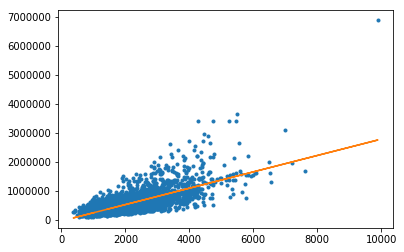

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

# Trích xuất thêm các features khác.

In [0]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [22]:
sales[my_features].show()

Materializing SFrame

In [23]:
turicreate.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Xây dựng một model mới với những features đã được trích xuất

In [24]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.029662     | 4055343.923276     | 1687100.942246       | 189289.646451                   | 188487.216415                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# So sánh model được train chỉ với một feature (sqft_living) và model được train với nhiều features 



In [25]:
print (my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [26]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4138724.539496848, 'rmse': 255210.12994453174}
{'max_error': 3137706.5107811363, 'rmse': 180675.84391684344}


# Sự dụng hai model vừa được huấn luyện dể dự đoán giá nhà


In [0]:
house1 = sales[sales['id']=='5309101200']

In [28]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [29]:
print (house1['price'])

[620000.0]


In [30]:
print (sqft_model.predict(house1))

[629550.5003132592]


In [31]:
print (my_features_model.predict(house1))

[728996.5012061194]


# Dự đoán giá nhà cho ngôi nhà thứ hai mà xịn sò hơn ngôi nhà trước

In [0]:
house2 = sales[sales['id']=='1925069082']

In [33]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [34]:
print (sqft_model.predict(house2))

[1262589.7407438813]


In [35]:
print (my_features_model.predict(house2))

[1235053.2018433318]


# Dự đoán giá nhà của bố vợ tương lai


In [0]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [37]:
print (my_features_model.predict(turicreate.SFrame(bill_gates)))

[15098622.624392398]
